# Part I - (Titanic Dataset)
## by (Semanyoh Nissi Kekeli)


## Preliminary Data Cleaning and Transformation

 *The **main aim** of this process is to prepare the dataset for use by a machine learning model with much accuracy.*

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
# load in the dataset
data = sb.load_dataset('titanic')

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
work_data = data.copy()

In [6]:
# applying imputation to fill age null values
work_data['age'].fillna(work_data['age'].mean(), inplace=True)

In [7]:
# dropping irrelevant columns to the dataset
work_data.drop('deck', axis = 1, inplace=True)
work_data.drop('embark_town', axis = 1, inplace=True)

In [8]:
work_data.dropna(inplace=True)

In [9]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    889 non-null    int64   
 1   pclass      889 non-null    int64   
 2   sex         889 non-null    object  
 3   age         889 non-null    float64 
 4   sibsp       889 non-null    int64   
 5   parch       889 non-null    int64   
 6   fare        889 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       889 non-null    category
 9   who         889 non-null    object  
 10  adult_male  889 non-null    bool    
 11  alive       889 non-null    object  
 12  alone       889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 79.1+ KB


In [10]:
work_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Scaling: Log Transformation
work_data['fare_log'] = np.log(work_data['fare'] + 1e-8)



In [12]:
work_data.drop('fare', axis = 1, inplace=True)

In [13]:
# Feature engineering
work_data['family_size'] = work_data['sibsp'] + work_data['parch'] + 1

In [14]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  alive        889 non-null    object  
 11  alone        889 non-null    bool    
 12  fare_log     889 non-null    float64 
 13  family_size  889 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 86.1+ KB







## Part II - Data Visualization

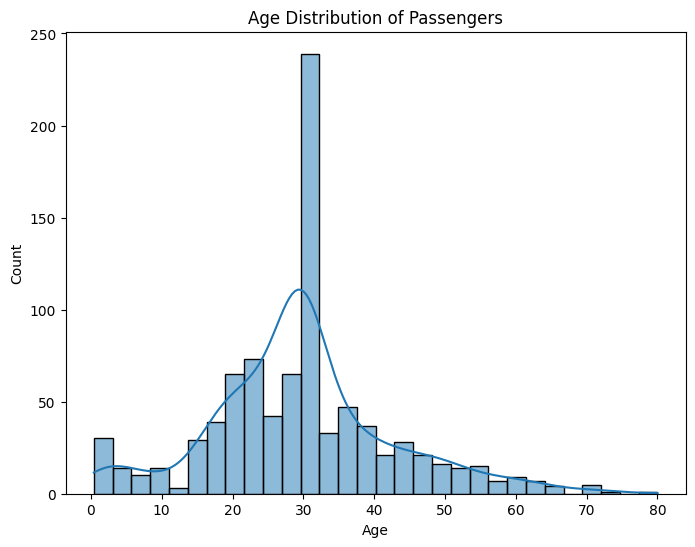

In [15]:
# Age distribution of passengers who survived
plt.figure(figsize=(8, 6))
sb.histplot(data=work_data, x='age', kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [16]:
# Age distribution of males and females who survived
# Filter the survived passengers
survived_work_data = work_data[work_data['survived'] == 1]

# Group by gender and age
grouped_work_data = survived_work_data.groupby(['sex', 'age']).size().reset_index(name='Count')

# Analyze the age distribution
male_df = grouped_work_data[grouped_work_data['sex'] == 'male']
female_df = grouped_work_data[grouped_work_data['sex'] == 'female']


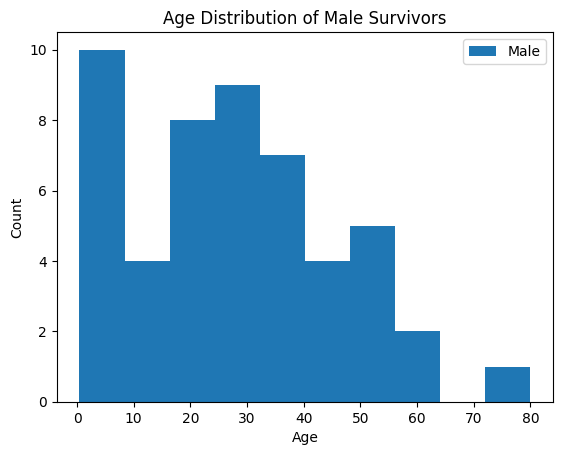

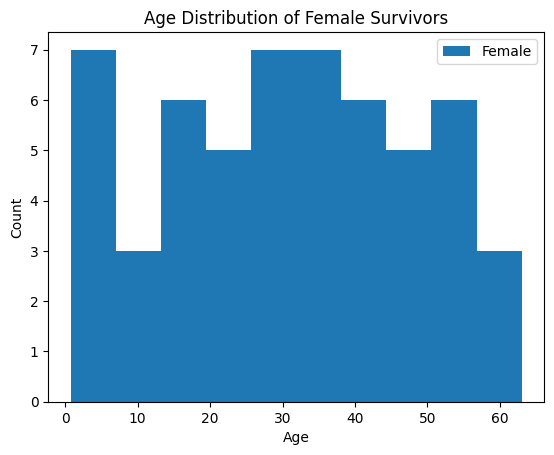

In [17]:
# Generate the histogram plot for males
plt.hist(male_df['age'], label='Male')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Survivors')
plt.legend()
plt.show()

# Generate the histogram plot for females
plt.hist(female_df['age'], label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Female Survivors')
plt.legend()
plt.show()

In [18]:
# Age distribution of males and females who did not survive
# Filter the deceased passengers
deceased_work_data = work_data[work_data['survived'] == 0]

# Group by gender and age
dgrouped_work_data = deceased_work_data.groupby(['sex', 'age']).size().reset_index(name='Count')

# Analyze the age distribution
dmale_df = dgrouped_work_data[dgrouped_work_data['sex'] == 'male']
dfemale_df = dgrouped_work_data[dgrouped_work_data['sex'] == 'female']

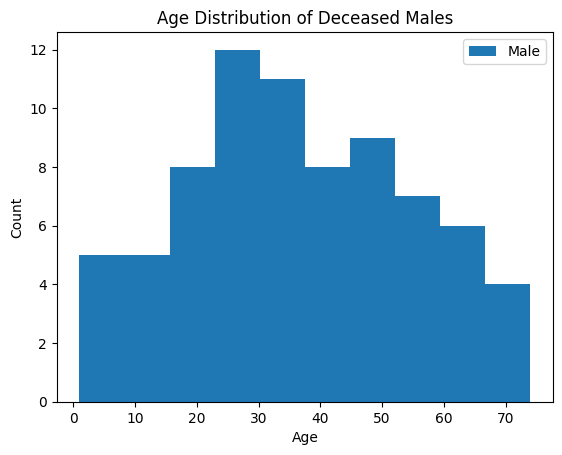

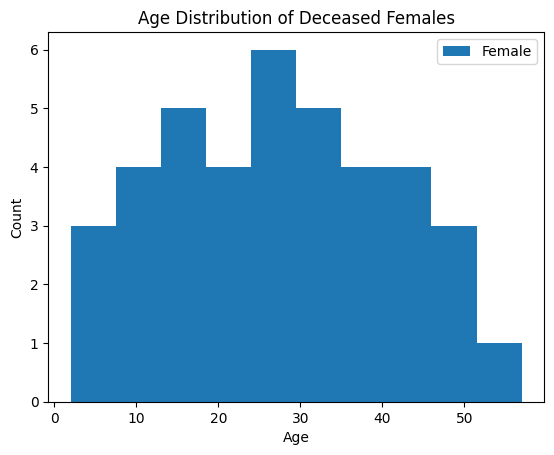

In [19]:
# Generate the histogram plot for males
plt.hist(dmale_df['age'], label='Male')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Deceased Males')
plt.legend()
plt.show()

# Generate the histogram plot for females
plt.hist(dfemale_df['age'], label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Deceased Females')
plt.legend()
plt.show()

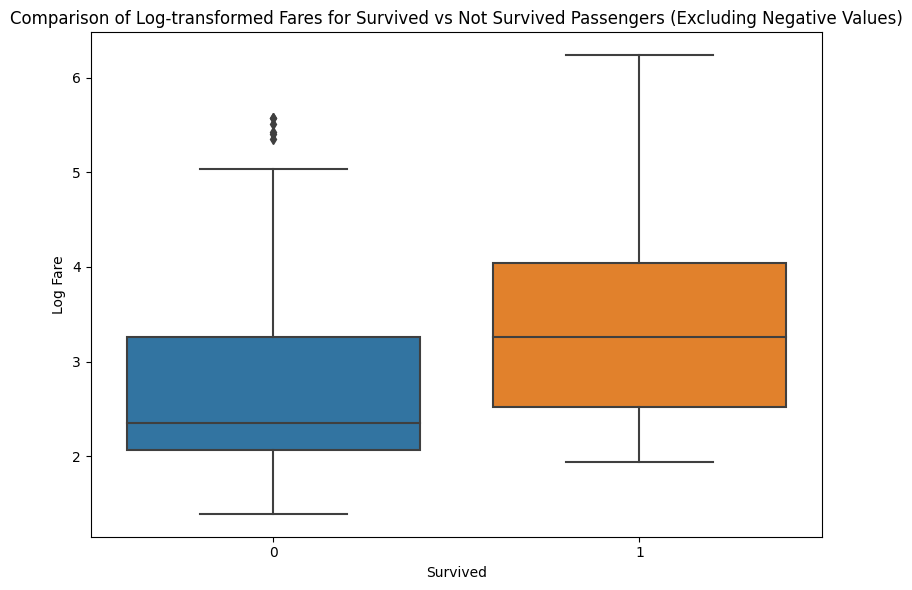

In [20]:
filtered_data = work_data[work_data['fare_log'] >= 0]

# Create a box plot
plt.figure(figsize=(8, 6))
sb.boxplot(x=filtered_data['survived'], y=filtered_data['fare_log'])
plt.xlabel('Survived')
plt.ylabel('Log Fare')
plt.title('Comparison of Log-transformed Fares for Survived vs Not Survived Passengers (Excluding Negative Values)')
plt.tight_layout()
plt.show()

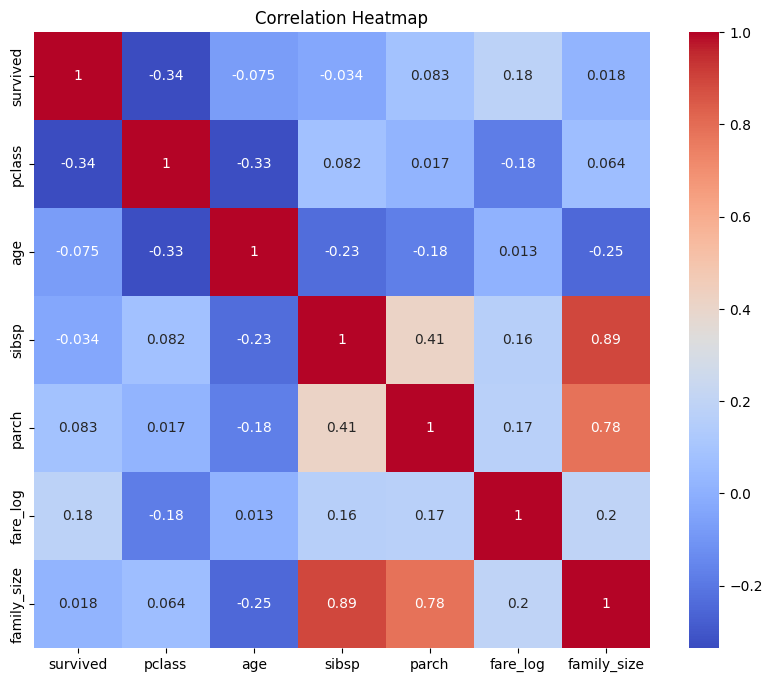

In [21]:
# Select only numeric variables
numeric_variables = work_data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_variables.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

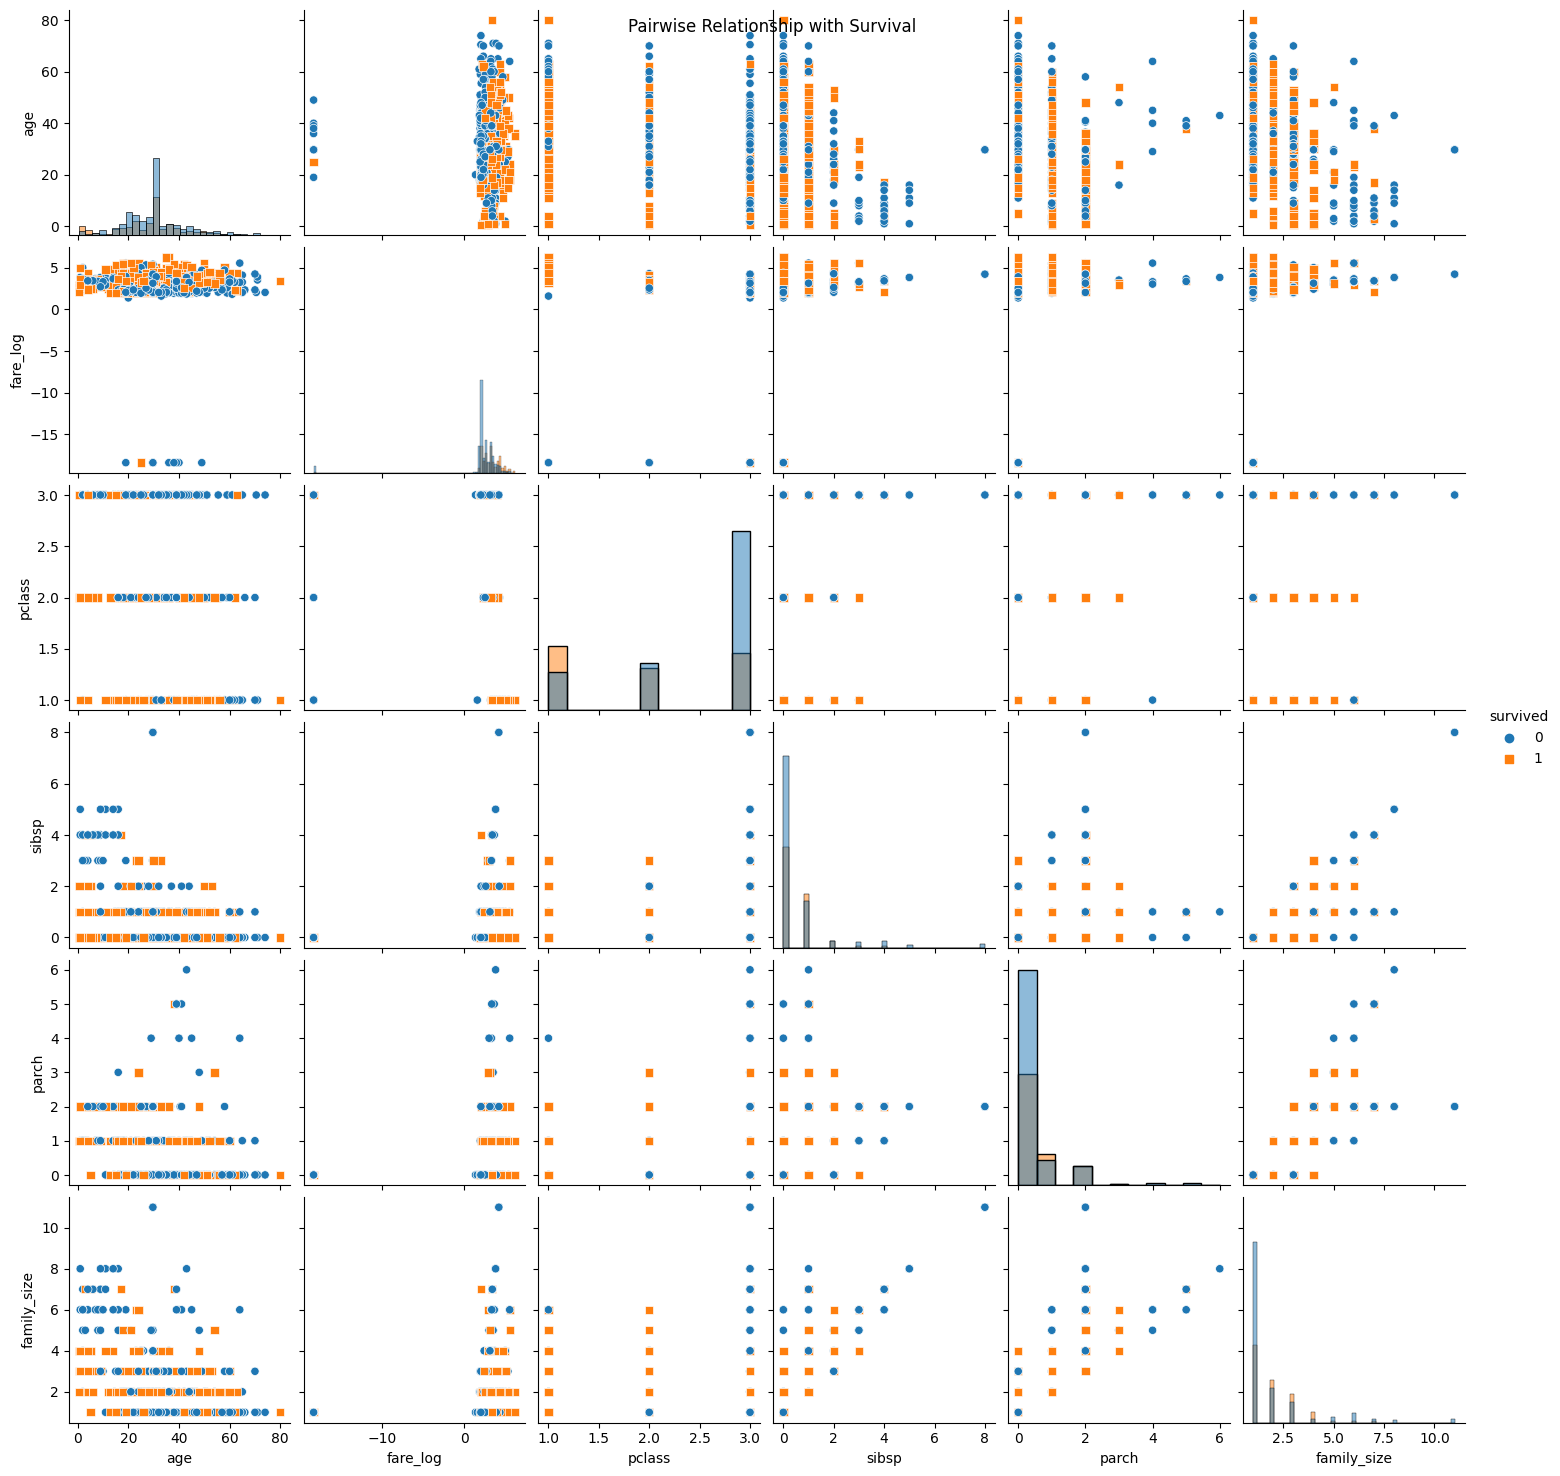

In [22]:
columns = ['survived', 'age', 'fare_log', 'pclass', 'sibsp', 'parch', 'family_size']

# Create a pairplot
sb.pairplot(data=work_data[columns], hue='survived', markers=['o', 's'], diag_kind='hist')
plt.suptitle("Pairwise Relationship with Survival")
plt.show()